In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file  = "list_WB_Data.csv"

data = pd.read_csv(file)
data = data.drop(columns = ['Unnamed: 4'])

In [3]:
data

,Series Name,Country Name,Time,Value
0,Agricultural land (sq. km),China,1960,NaN
1,Agricultural land (sq. km),China,1961,3.423500e+06
2,Agricultural land (sq. km),China,1962,3.451000e+06
3,Agricultural land (sq. km),China,1963,3.479500e+06
4,Agricultural land (sq. km),China,1964,3.508000e+06
...,...,...,...,...
18539,"Agriculture, forestry, and fishing, value adde...",World,2016,3.477198e+00
18540,"Agriculture, forestry, and fishing, value adde...",World,2017,3.442346e+00
18541,"Agriculture, forestry, and fishing, value adde...",World,2018,3.271979e+00
18542,"Agriculture, forestry, and fishing, value adde...",World,2019,NaN


In [4]:
set(data['Series Name'])

{'Access to electricity (% of population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agricultural land (sq. km)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Annual freshwater withdrawals, total (billion cubic meters)',
 'Arable land (% of land area)',
 'Average precipitation in depth (mm per year)',
 'CO2 emissions (kg per 2010 US$ of GDP)',
 'CO2 emissions (kg per 2017 PPP $ of GDP)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from gaseous fuel consumption (kt)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'CO2 emissions from solid fuel consumption (kt)',
 'CO2 intensity (

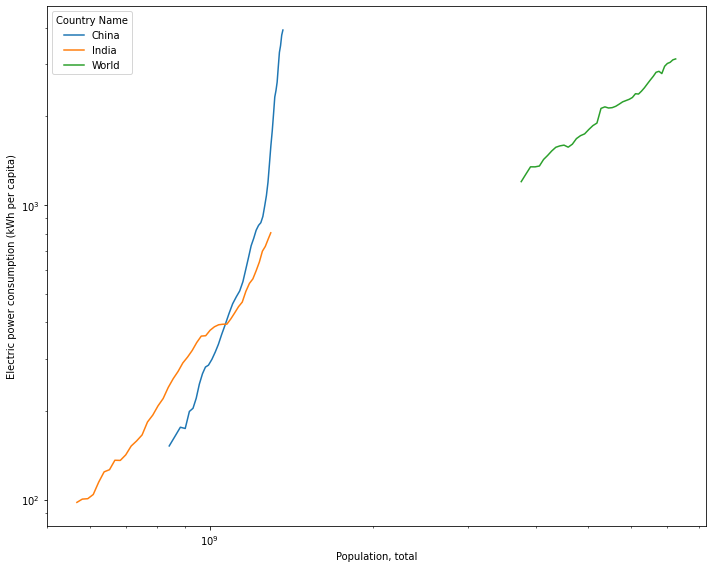

In [5]:
table = pd.pivot_table(data, index = ["Country Name", "Time"],
          columns = "Series Name",
          values = "Value")

table = table.drop(index = '5=best)', level = 0)
table.reset_index(inplace=True)
table[["Time"]] = table[["Time"]].apply(pd.to_numeric)

plt.figure(figsize= (10,8))
sns.lineplot(data = table[table['Country Name'] != 'United Kingdom'] , 
            x = 'Population, total', 
            y = 'Electric power consumption (kWh per capita)',
            hue = 'Country Name')


plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

<Figure size 720x576 with 0 Axes>

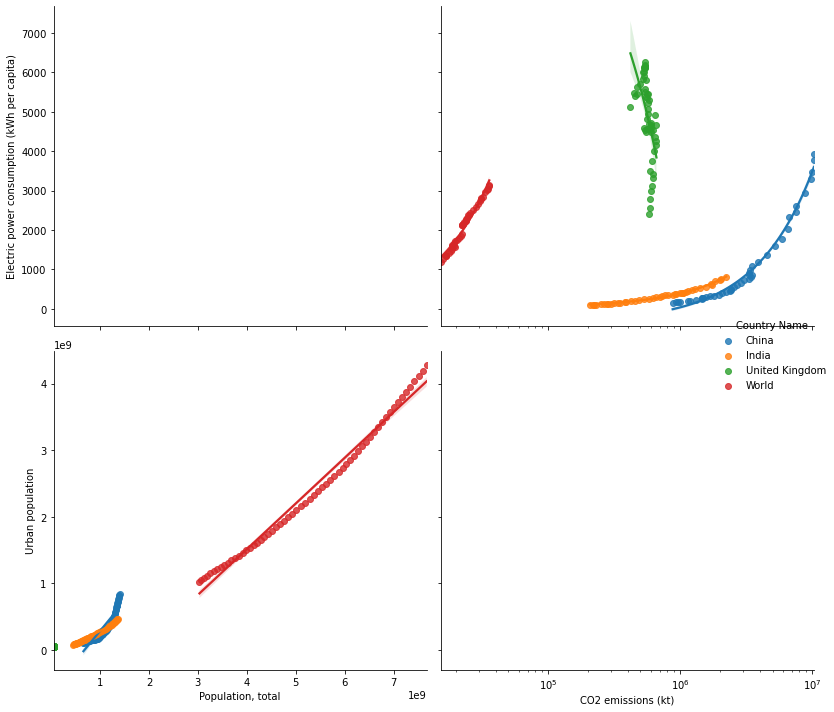

In [6]:
uk=table[table['Country Name'] != 'World']
#table['country'] = table.index.get_level_values('Country Name')

plt.figure(figsize=(10,8))
sns.pairplot(data = table, 
             x_vars = ['Population, total','CO2 emissions (kt)'],
             y_vars = ['Electric power consumption (kWh per capita)','Urban population'],
             hue = 'Country Name',
             height = 5, kind = 'reg')

plt.xscale('log')
plt.tight_layout()
plt.show()

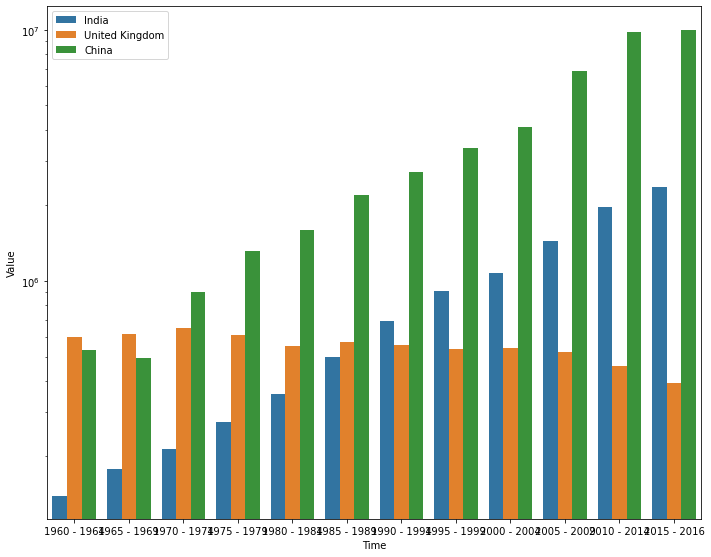

In [7]:
def series_dataset(series_name):
    
    # Filterring the data with the required series
    filtered_dataset = data[data['Series Name'] == series_name]
    
    is_NaN = filtered_dataset.isnull()   # Checking for null values

    row_has_NaN = is_NaN.any(axis=1)  # Checking for rows with null values

    rows_with_NaN = filtered_dataset[row_has_NaN] # Getting rows with null values
    
    # Removing rows with null values so that same year values 
    # for all contries can be sused for plotting an analising data to compare
    filtered_dataset = filtered_dataset.drop([i for i in rows_with_NaN.index])
    
    # Creating a empty list to contain all values
    data_by_year=[]
    
    # Dividing dataset according to contries and string mean value of the series 
    # in the group of 5 years
    for country in set(filtered_dataset['Country Name']):
        data_country = filtered_dataset[filtered_dataset['Country Name'] == country]
        i=0
        while i < len(data_country['Time']) :
            Data = data_country[i:i+5]

            data_by_year.append([country, f"{int(Data['Time'].min())} - {int(Data['Time'].max())}", 
                                 Data['Value'].mean()])
            i += 5
    # Creating new data base with mean vaulues with year group size =5
    
    data_year = pd.DataFrame(data_by_year, 
                             columns = ['Country Name', 'Time', 'Value'])
    
    return data_year
    
    

data_year = series_dataset('CO2 emissions (kt)')

plt.figure(figsize= (10,8))
sns.color_palette("colorblind")

sns.barplot(x = 'Time', 
            y = 'Value', 
            hue = 'Country Name', 
            data = data_year[data_year['Country Name'] != ('World')])

table[["Time"]] = table[["Time"]].apply(pd.to_numeric)

plt.tight_layout()
plt.yscale('log')
plt.legend()
plt.show()

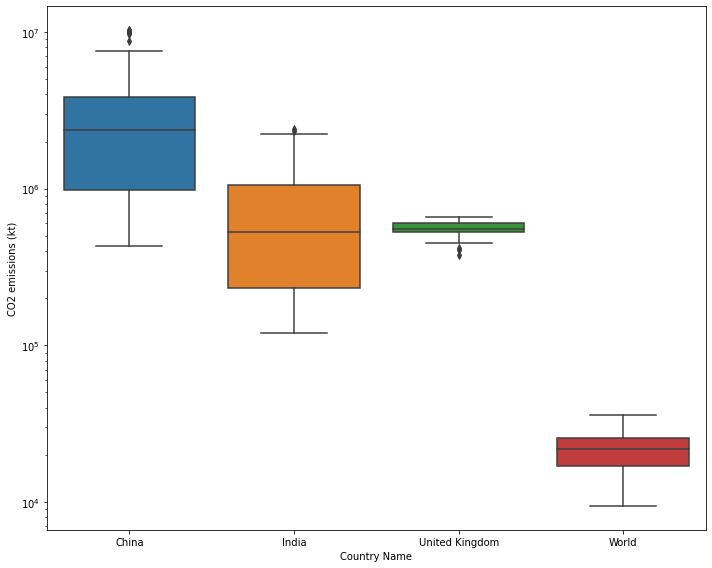

In [8]:
#uk=table[table['Country Name'] != 'World']
#table['country'] = table.index.get_level_values('Country Name')

plt.figure(figsize=(10,8))
sns.boxplot(data = table, 
             y = 'CO2 emissions (kt)',
             x = 'Country Name')

plt.yscale('log')
plt.tight_layout()
plt.show()

In [9]:
data_year = series_dataset('Population, total')
data_year

,Country Name,Time,Value
0,India,1960 - 1964,4.693882e+08
1,India,1965 - 1969,5.207507e+08
2,India,1970 - 1974,5.815436e+08
3,India,1975 - 1979,6.527274e+08
4,India,1980 - 1984,7.325679e+08
5,India,1985 - 1989,8.197642e+08
6,India,1990 - 1994,9.093727e+08
7,India,1995 - 1999,1.000946e+09
8,India,2000 - 2004,1.093208e+09
9,India,2005 - 2009,1.182940e+09


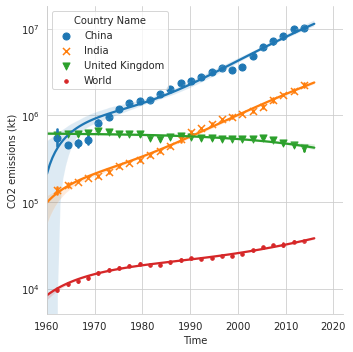

In [81]:
sns.set_style("whitegrid")
sns.lmplot(data = table,
            x = "Time",
            y = 'CO2 emissions (kt)',
            x_estimator= np.mean, x_bins=25, 
            markers=['o','x','v', '.'],
            hue = 'Country Name', order = 3,
            truncate=True, fit_reg= True, legend_out = False)
plt.yscale('log')
plt.tight_layout()
plt.savefig("Co2_time.svg")

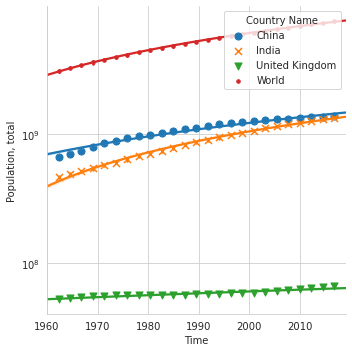

In [80]:
sns.set_style("whitegrid")
sns.lmplot(data = table,
            x = "Time",
            y = 'Population, total',
            x_estimator= np.mean, x_bins=25, 
            markers=['o','x','v', '.'],
            hue = 'Country Name', order = 1,
            truncate=True, legend_out = False)
plt.yscale('log')
plt.tight_layout()
plt.savefig("population_time.svg")

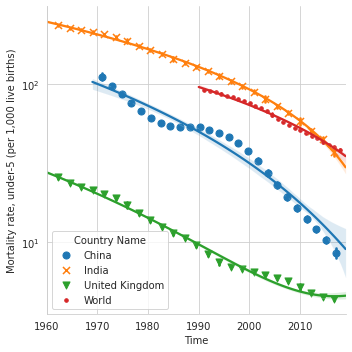

In [12]:
sns.lmplot(data = table,
           x = "Time",
           y = 'Mortality rate, under-5 (per 1,000 live births)',
           x_estimator= np.mean, x_bins=25, 
           markers=['o','x','v', '.'],
           hue = 'Country Name', order = 2,
           truncate=True, legend_out = False)
plt.yscale('log')
plt.tight_layout()
plt.savefig('Mortality.svg')

In [13]:
table1 = table.loc[:,['Country Name', 'Time','Population, total','CO2 emissions (kt)']]
table1 = table1.dropna()

/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


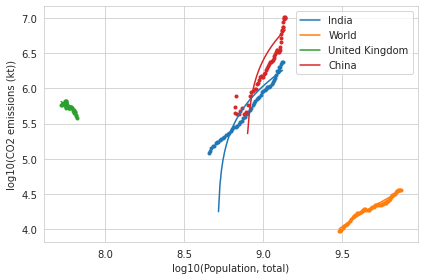

/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


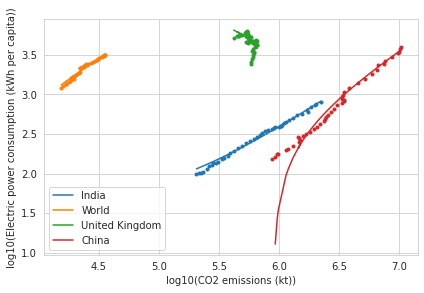

In [79]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
def plot_regression(data, X, Y):
    table1 = data.loc[:,['Country Name', 'Time', X, Y]]
    table1 = table1.dropna()
    country_list = set(data['Country Name'])
    for country in country_list:
        table_new = table1[table['Country Name'] == country]
        x = table_new.loc[:,[X]].values
        y = table_new.loc[:,[Y]].values
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
        lin_reg = LinearRegression()
        lin_reg.fit(x, y)
        plt.scatter(np.log10(x), np.log10(y), marker = '.')
        plt.plot(np.log10(x), np.log10(lin_reg.predict(x)), label = country)
        
    plt.xlabel(f'log10({X})')
    plt.ylabel(f'log10({Y})')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{Y}vs{X}.svg')
    plt.show()
    return

plot_regression(table,'Population, total','CO2 emissions (kt)')
plot_regression(table,'CO2 emissions (kt)','Electric power consumption (kWh per capita)')                          

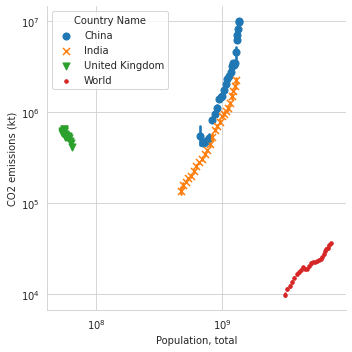

In [78]:
sns.lmplot(data = table1,
           x = 'Population, total',
           y = 'CO2 emissions (kt)', 
           x_estimator= np.mean, x_bins=25, 
           markers=['o','x','v', '.'],
           hue = 'Country Name',fit_reg= False,
           truncate=True, legend_out = False)

plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig('Co2vspopulation.svg')

In [16]:
country_list = set(table1['Country Name'])
for country in country_list:
    print(country)
    print(table1[table1['Country Name'] == country].describe())

India
Series Name         Time  Population, total  CO2 emissions (kt)
count          57.000000       5.700000e+01        5.700000e+01
mean         1988.000000       8.557458e+08        7.630825e+05
std            16.598193       2.739150e+08        6.454444e+05
min          1960.000000       4.505477e+08        1.205820e+05
25%          1974.000000       6.088026e+08        2.319928e+05
50%          1988.000000       8.374689e+08        5.275640e+05
75%          2002.000000       1.093317e+09        1.054259e+06
max          2016.000000       1.324510e+09        2.407672e+06
World
Series Name         Time  Population, total  CO2 emissions (kt)
count          57.000000       5.700000e+01           57.000000
mean         1988.000000       5.136985e+09        21899.645667
std            16.598193       1.333595e+09         7590.912993
min          1960.000000       3.031438e+09         9420.523000
25%          1974.000000       3.988478e+09        16919.538000
50%          1988.000000    

In [17]:
for country in country_list:
    table2 = table1[table1['Country Name'] == country]
    population = table2.loc[:,['Population, total']].values
    co2 = table2.loc[:, ['CO2 emissions (kt)']].values
    X = np.vstack((population,co2))

    C = np.cov(X)
    print(country)
    print(C)

India
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
World
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
United Kingdom
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
China
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Degrees of freedom <= 0 for slice
  import sys
/home/aloksingh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/aloksingh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [26]:
from scipy import stats
country_list = set(table1['Country Name'])
for country in country_list:
    table2 = table1[table1['Country Name'] == country]
    population = table2['Population, total']
    co2 = table2['CO2 emissions (kt)']
    r,p = stats.pearsonr(population, co2)
    print(country)
    print(r,p)
    print('spearman')
    r,p = stats.spearmanr(population, co2)
    print(r,p)
    print('kendall')
    t,p = stats.kendalltau(population,co2)
    print(t,p)
    print('kalmogrove')
    d,p = stats.ks_2samp(population,co2)
    print(d,p)

India
0.9431936914029515 5.424272712468778e-28
spearman
0.9998703655690953 2.5538763991129415e-100
kendall
0.9974937343358398 6.01023153801266e-28
kalmogrove
1.0 1.2914429985198208e-33
World
0.9815719108259295 3.206662441464062e-41
spearman
0.9972776769509982 5.67315950277407e-64
kendall
0.9749373433583961 9.011801681300978e-27
kalmogrove
1.0 1.2914429985198208e-33
United Kingdom
-0.8673487416918806 2.644711605270772e-18
spearman
-0.8954498314752399 5.551342266956506e-21
kendall
-0.7080200501253133 7.32450560108613e-15
kalmogrove
1.0 1.2914429985198208e-33
China
0.8355395988297496 6.306253715195343e-16
spearman
0.9911848586984705 5.660668318879576e-50
kendall
0.9473684210526317 2.270534628819522e-25
kalmogrove
1.0 1.2914429985198208e-33


In [33]:
country_list = set(table1['Country Name'])
for country in country_list:
    print(country)
    table2 = table1[table1['Country Name'] == country]
    table2['Co2 per capita'] = (table2['CO2 emissions (kt)']/ table2['Population, total'])*10**9 
    print('Population\n',
         stats.mstats.describe(table2['Population, total']))
    print('CO2\n',
         stats. mstats.describe(table2['CO2 emissions (kt)']))
    print('co2percapita \n', stats.mstats.describe(table2['Co2 per capita']))

India
Population
 DescribeResult(nobs=array(57), minmax=(masked_array(data=4.50547679e+08,
             mask=False,
       fill_value=1e+20), masked_array(data=1.32450959e+09,
             mask=False,
       fill_value=1e+20)), mean=855745774.1578947, variance=7.371312918531816e+16, skewness=masked_array(data=0.15041845,
             mask=False,
       fill_value=1e+20), kurtosis=-1.2929377267259068)
CO2
 DescribeResult(nobs=array(57), minmax=(masked_array(data=120581.961,
             mask=False,
       fill_value=1e+20), masked_array(data=2407671.526,
             mask=False,
       fill_value=1e+20)), mean=763082.4993333335, variance=409289732978.598, skewness=masked_array(data=1.05273351,
             mask=False,
       fill_value=1e+20), kurtosis=0.06558713465556565)
co2percapita 
 DescribeResult(nobs=array(57), minmax=(masked_array(data=267634.18528231,
             mask=False,
       fill_value=1e+20), masked_array(data=1817783.38639117,
             mask=False,
       fill_valu

/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [52]:
table1['Co2 per capita (kg)'] = (table1['CO2 emissions (kt)']/ table1['Population, total'])*10**6
table1['Co2 per capita (kg)'].describe()

count      228.000000
mean      3300.877828
std       4052.796617
min          3.079225
25%        201.972073
50%       1072.994538
75%       7192.236278
max      11823.036290
Name: Co2 per capita (kg), dtype: float64

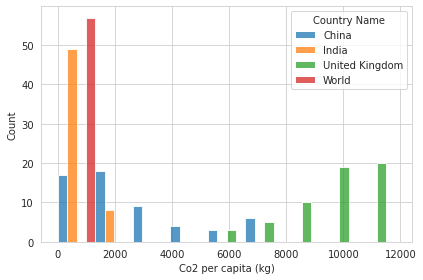

In [87]:
sns.histplot(data = table1, x = 'Co2 per capita (kg)', 
             hue = 'Country Name', multiple = 'dodge',
             stat = 'count') 
plt.tight_layout()

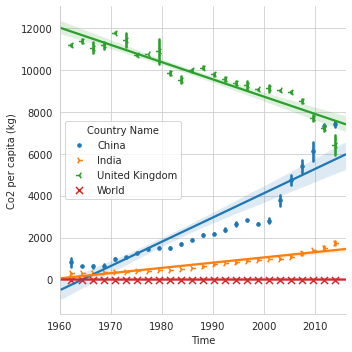

In [101]:
sns.lmplot(data = table1, 
          x = 'Time', 
          y = 'Co2 per capita (kg)', 
          hue = 'Country Name', 
          markers = ['.', '4', "3", 'x'], 
          x_bins= 25, 
          fit_reg= True, truncate = True, x_ci = 'sd',
          legend_out = False)
plt.tight_layout()
plt.savefig('CO2pc.svg')

In [103]:
from scipy import stats
country_list = set(table1['Country Name'])
for country in country_list:
    print(country)
    table2 = table1[table1['Country Name'] == country]
    table2['Co2 per capita'] = (table2['CO2 emissions (kt)']/ table2['Population, total'])*10**9 
    print('co2percapita \n', stats.pearsonr(table2['Co2 per capita'], table2['Time']))

India
co2percapita 
 (0.9466752185718064, 9.973016776587638e-29)
World
co2percapita 
 (0.8051608550274023, 4.366588645295746e-14)
United Kingdom
co2percapita 
 (-0.926672546173738, 4.882729277831726e-25)
China
co2percapita 
 (0.902463630072733, 9.03475996322518e-22)


/home/aloksingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
